In [1]:
# Import necessary packages
import numpy as np
import pickle
import matplotlib.pyplot as plt

from helpers import generate_data, plot_sols, train_test_data, save_to_file

In [2]:
# Generate continuation data
# generate_data('contparameters.json', 0.1, 1.0, 0.1, 0.5, 0.05)

In [3]:
# Save to file 
save_to_file(10)

In [ ]:
# Read dictionary pkl file
with open('data.pkl', 'rb') as fp:
    data = pickle.load(fp)

#### Periodic Solutions && NLFR Curve

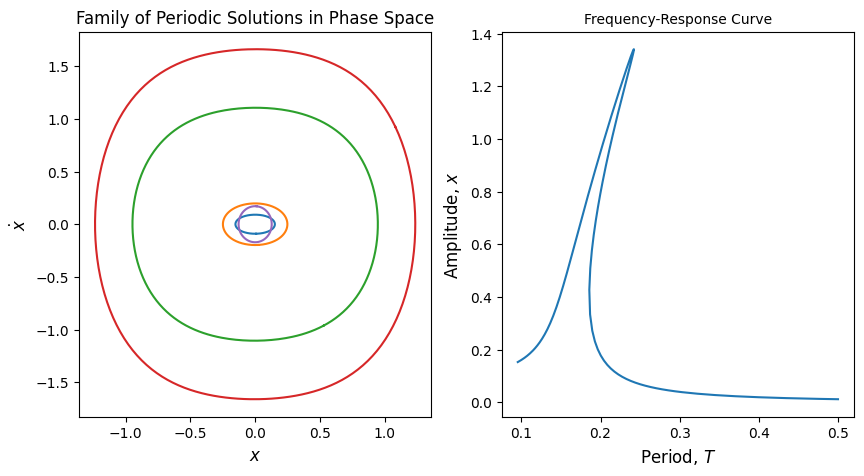

In [5]:
data = plot_sols('FRF1')

#### Example of Position, Velocity and Acceleration progression

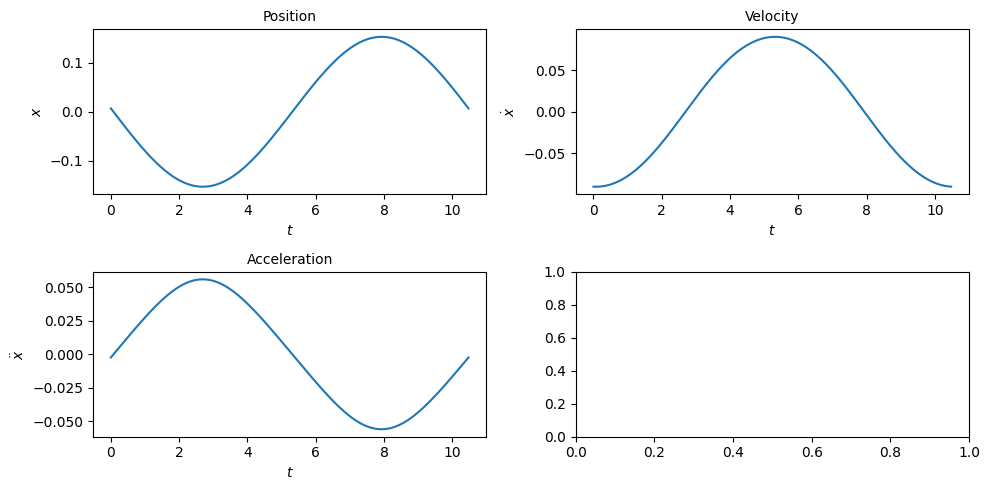

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

ax[0, 0].set_title('Position', fontsize=10)
ax[0, 0].plot(data['time'][:, 0], data['pose'][:, 0])
ax[0, 0].set_xlabel(r'$t$')
ax[0, 0].set_ylabel(r'${x}$')

ax[0, 1].set_title('Velocity', fontsize=10)
ax[0, 1].plot(data['time'][:, 0], data['vel'][:, 0])
ax[0, 1].set_xlabel(r'$t$')
ax[0, 1].set_ylabel(r'$\dot{x}$')

ax[1, 0].set_title('Acceleration', fontsize=10)
ax[1, 0].plot(data['time'][:, 0], data['acc'][:, 0])
ax[1, 0].set_xlabel(r'$t$')
ax[1, 0].set_ylabel(r'$\ddot{x}$')

fig.tight_layout()

In [7]:
data['time'].shape

(301, 148)